In [ ]:
# This installs a Python library called arpa, which is used for loading arpa format language files.
# For more information, see: https://pypi.org/project/arpa/
# Run this cell before running other cells in this notebook that use the arpa library.

!pip install arpa
import arpa

# Here are some examples of how to use arpa:

demo_model = arpa.loadf("data/bnc_10k_with_smoothing.arpa")[0]
 
# demo_model.p will give you the conditional probability of the last item given what came before
print("P(there|hi) = {:.4f}".format(demo_model.p(["hi", "there"])))

# You can pass a list of terms or a string (arpa will automatically split on spaces).
print("P(there|hi) = {:.4f}".format(demo_model.p("hi there")))

# demo_model.log_p will give you log probabilities
print("log_p(there|hi) = {:.4f}".format(demo_model.log_p(["hi", "there"])))

# demo_model.vocabulary() will return the vocabulary of the language model
print("'hi' in demo_model.vocabulary() = {:.4f}".format("hi" in demo_model.vocabulary()))

# For this problem set, the arpa models are bigram models. Arpa models will not raise an error
# when passed trigrams, but the probabilities are not correct. It actually returns the bigram
# probability of the last two tokens in the input.
print("P(there|well hi) != {:.4f}".format(demo_model.p(["well", "hi", "there"])))  # same output as demo_model.p([hi", "there"])

# Note that all input to the arpa model should be lowercase. The following will raise an error:
# demo_model.p(["Hi"])

  Obtaining dependency information for arpa from https://files.pythonhosted.org/packages/c6/8e/f396e5e9fc47bf06891e25211f59bd15f37260046c43aea8131efd8ec6e6/arpa-0.1.0b4-py3-none-any.whl.metadata
P(there|hi) = 0.0025
P(there|hi) = 0.0025
log_p(there|hi) = -2.5984
'hi' in demo_model.vocabulary() = 1.0000
P(there|well hi) != 0.0025


In [ ]:
import arpa
import numpy as np
import csv

model_with_smoothing = arpa.loadf("data/bnc_10k_with_smoothing.arpa")[0]
vocab = set(model_with_smoothing.vocabulary())

def compute_surprisal(arpa_model, bigram):
    if bigram[0] not in vocab or bigram[1] not in vocab:
        return None
    prob = arpa_model.p(bigram)
    if prob is None:
        return None
    surprisal = -np.log2(prob)
    return surprisal

files_to_process = ["doctorenglish.txt", "animalenglish.txt", "importantenglish.txt", "familyenglish.txt", "colorenglish.txt"]

# Open CSV to save results
with open('surprisal_results_no_OOV.csv', mode='w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['File', 'Bigram', 'Surprisal'])

    for filename in files_to_process:
        print(f"\nProcessing {filename}...")
        with open(filename, "r", encoding="utf-8") as f:
            lines = f.readlines()

        for line in lines:
            words = line.strip().split()
            if len(words) < 2:
                continue

            for i in range(len(words) - 1):
                bigram = (words[i], words[i+1])
                surprisal_value = compute_surprisal(model_with_smoothing, bigram)

                if surprisal_value is not None:
                    print(f"Surprisal of '{bigram[0]} {bigram[1]}' in {filename}: {surprisal_value:.4f}")
                    writer.writerow([filename, f"{bigram[0]} {bigram[1]}", f"{surprisal_value:.4f}"])


Processing doctorenglish.txt...
Surprisal of 'a stack' in doctorenglish.txt: 17.6110
Surprisal of 'stack of' in doctorenglish.txt: 5.4155
Surprisal of 'of unpaid' in doctorenglish.txt: 17.6328
Surprisal of 'found out' in doctorenglish.txt: 9.4428
Surprisal of 'out when' in doctorenglish.txt: 10.0702
Surprisal of 'when she' in doctorenglish.txt: 4.4507
Surprisal of 'to the' in doctorenglish.txt: 3.2845
Surprisal of 'the doctor' in doctorenglish.txt: 10.0888
Surprisal of 'doctor that' in doctorenglish.txt: 7.3380
Surprisal of 'that she' in doctorenglish.txt: 6.4005
Surprisal of 'she and' in doctorenglish.txt: 8.2189
Surprisal of 'and her' in doctorenglish.txt: 8.3206
Surprisal of 'lost their' in doctorenglish.txt: 9.0103
Surprisal of 'their health' in doctorenglish.txt: 11.0205
Surprisal of 'to be' in doctorenglish.txt: 3.6830
Surprisal of 'only on' in doctorenglish.txt: 7.5096
Surprisal of 'on their' in doctorenglish.txt: 6.5812
Surprisal of 'goal to' in doctorenglish.txt: 5.7234
Surpr

In [26]:
import arpa
import numpy as np
import csv

# Load your bigram model
model_with_smoothing = arpa.loadf("data/bnc_10k_with_smoothing.arpa")[0]
vocab = set(model_with_smoothing.vocabulary())

def compute_surprisal(arpa_model, bigram):
    if bigram[0] not in vocab or bigram[1] not in vocab:
        return None
    prob = arpa_model.p(bigram)
    if prob is None:
        return None
    surprisal = -np.log2(prob)
    return surprisal

# Read your tagged corpus
with open('bilingual_cognates_corpus_tagged.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Select only English lines
english_lines = [line[4:].strip() for line in lines if line.startswith("[EN]")]

# Process only English lines
results = []
for line in english_lines:
    words = line.split()
    if len(words) < 2:
        continue

    for i in range(len(words) - 1):
        bigram = (words[i], words[i+1])
        surprisal_value = compute_surprisal(model_with_smoothing, bigram)

        if surprisal_value is not None:
            results.append(("EN", f"{bigram[0]} {bigram[1]}", surprisal_value))

# Save results
with open('english_only_surprisal_results.csv', mode='w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Language', 'Bigram', 'Surprisal'])
    for result in results:
        writer.writerow(result)

print("English-only surprisal results saved into 'english_only_surprisal_results.csv'")


English-only surprisal results saved into 'english_only_surprisal_results.csv'


In [30]:
# Your list of focus words
focus_words = ['doctor', 'animal', 'hospital', 'color', 'important', 'actor', 'hotel']

# Process only English lines
results = []
for line in english_lines:
    words = line.split()
    if len(words) < 2:
        continue

    for i in range(len(words) - 1):
        bigram = (words[i], words[i+1])
        
        # Only keep bigrams that involve your focus words
        if bigram[0].lower() in focus_words or bigram[1].lower() in focus_words:
            surprisal_value = compute_surprisal(model_with_smoothing, bigram)

            if surprisal_value is not None:
                results.append(("EN", f"{bigram[0]} {bigram[1]}", surprisal_value))


In [31]:
with open('focus_words_surprisal_results.csv', mode='w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Language', 'Bigram', 'Surprisal'])
    for result in results:
        writer.writerow(result)

print("Surprisal results for focus words saved into 'focus_words_surprisal_results.csv'")


Surprisal results for focus words saved into 'focus_words_surprisal_results.csv'


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the English-only results
df = pd.read_csv('english_only_surprisal_results.csv')

# Quick look at the data
print(df.head())


  Language          Bigram  Surprisal
0       EN        near the   2.266414
1       EN   an accidental  17.924417
2       EN  will accompany  14.863313
3       EN    accompany us  11.566996
4       EN           us to   3.072408


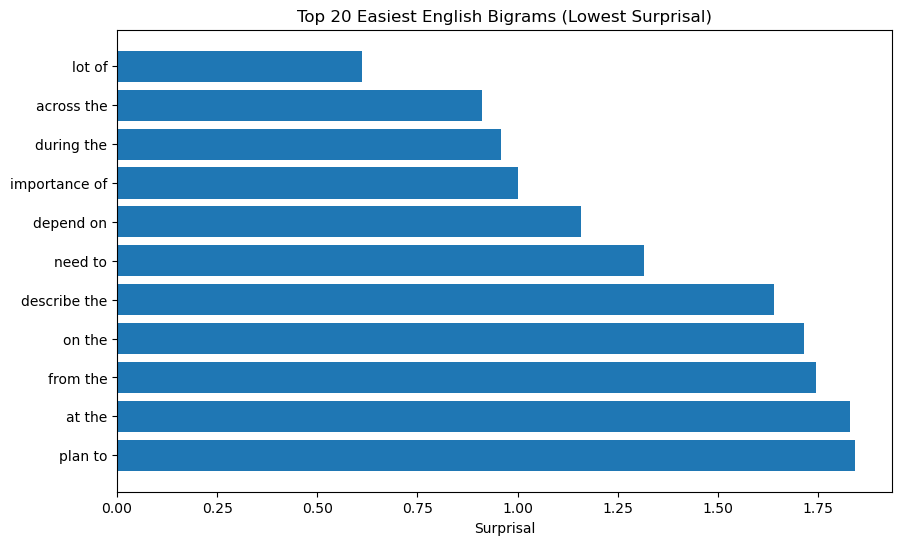

In [34]:
# Sort by surprisal
df_sorted = df.sort_values(by='Surprisal')

# Take top 20 easiest bigrams
top_20 = df_sorted.head(20)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_20['Bigram'], top_20['Surprisal'])
plt.xlabel('Surprisal')
plt.title('Top 20 Easiest English Bigrams (Lowest Surprisal)')
plt.gca().invert_yaxis()  # So lowest is at top
plt.show()


In [ ]:
import arpa
import numpy as np
import csv

model_with_smoothing = arpa.loadf("data/bnc_10k_with_smoothing.arpa")[0]
vocab = set(model_with_smoothing.vocabulary())

def compute_surprisal(arpa_model, bigram):
    if bigram[0] not in vocab or bigram[1] not in vocab:
        return None
    prob = arpa_model.p(bigram)
    if prob is None:
        return None
    surprisal = -np.log2(prob)
    return surprisal

# List of your files
files_to_process = ["data/bilingual_cognates_corpus.txt"]

# Open CSV to save results
with open('surprisal_results_no_OOV.csv', mode='w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['File', 'Bigram', 'Surprisal'])

    for filename in files_to_process:
        print(f"\nProcessing {filename}...")
        with open(filename, "r", encoding="utf-8") as f:
            lines = f.readlines()

        for line in lines:
            words = line.strip().split()
            if len(words) < 2:
                continue

            for i in range(len(words) - 1):
                bigram = (words[i], words[i+1])
                surprisal_value = compute_surprisal(model_with_smoothing, bigram)

                if surprisal_value is not None:
                    print(f"Surprisal of '{bigram[0]} {bigram[1]}' in {filename}: {surprisal_value:.4f}")
                    writer.writerow([filename, f"{bigram[0]} {bigram[1]}", f"{surprisal_value:.4f}"])


Processing data/bilingual_cognates_corpus.txt...
Surprisal of 'near the' in data/bilingual_cognates_corpus.txt: 2.2664
Surprisal of 'de la' in data/bilingual_cognates_corpus.txt: 2.6978
Surprisal of 'an accidental' in data/bilingual_cognates_corpus.txt: 17.9244
Surprisal of 'will accompany' in data/bilingual_cognates_corpus.txt: 14.8633
Surprisal of 'accompany us' in data/bilingual_cognates_corpus.txt: 11.5670
Surprisal of 'us to' in data/bilingual_cognates_corpus.txt: 3.0724
Surprisal of 'to the' in data/bilingual_cognates_corpus.txt: 3.2845
Surprisal of 'very active' in data/bilingual_cognates_corpus.txt: 10.0059
Surprisal of 'active in' in data/bilingual_cognates_corpus.txt: 3.4262
Surprisal of 'en los' in data/bilingual_cognates_corpus.txt: 17.5750
Surprisal of 'fun for' in data/bilingual_cognates_corpus.txt: 7.1254
Surprisal of 'admire her' in data/bilingual_cognates_corpus.txt: 8.6967
Surprisal of 'her strength' in data/bilingual_cognates_corpus.txt: 13.3725
Surprisal of 'streng

In [20]:
import arpa
import numpy as np
import csv

# Load your bigram model (make sure this is trained and available)
model_with_smoothing = arpa.loadf("data/bnc_10k_with_smoothing.arpa")[0]
vocab = set(model_with_smoothing.vocabulary())

def compute_surprisal(arpa_model, bigram):
    if bigram[0] not in vocab or bigram[1] not in vocab:
        return None
    prob = arpa_model.p(bigram)
    if prob is None:
        return None
    surprisal = -np.log2(prob)
    return surprisal

# Read your tagged corpus
with open('bilingual_cognates_corpus_tagged.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Separate English and Spanish lines
english_lines = [line[4:].strip() for line in lines if line.startswith("[EN]")]
spanish_lines = [line[4:].strip() for line in lines if line.startswith("[ES]")]

# Function to process lines
def process_lines(lines, label):
    results = []
    for line in lines:
        words = line.split()
        if len(words) < 2:
            continue

        for i in range(len(words) - 1):
            bigram = (words[i], words[i+1])
            surprisal_value = compute_surprisal(model_with_smoothing, bigram)

            if surprisal_value is not None:
                results.append((label, f"{bigram[0]} {bigram[1]}", surprisal_value))
    
    return results

# Process English and Spanish lines separately
english_results = process_lines(english_lines, "EN")
spanish_results = process_lines(spanish_lines, "ES")

# Combine and save results
all_results = english_results + spanish_results

with open('surprisal_results_tagged.csv', mode='w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Language', 'Bigram', 'Surprisal'])
    for result in all_results:
        writer.writerow(result)

print("Surprisal results for EN and ES lines saved into 'surprisal_results_tagged.csv'")


Surprisal results for EN and ES lines saved into 'surprisal_results_tagged.csv'


In [ ]:
import pandas as pd

df = pd.read_csv('surprisal_results_tagged.csv')

selected_rows = df.iloc[207:230]

print(selected_rows[['Language', 'Bigram', 'Surprisal']])

    Language          Bigram  Surprisal
207       EN           a few   6.329123
208       EN         much to   5.594512
209       EN       softly in   6.318359
210       EN          in the   1.861511
211       EN         a basic  11.787712
212       EN    very nervous  17.149946
213       EN  nervous before  10.672892
214       EN      before the   2.596367
215       EN          on the   1.714952
216       EN   important for   8.612673
217       EN           for a   3.544321
218       EN            on a   3.773847
219       EN       month for   6.233525
220       EN       closed on   7.494226
221       EN         just an  10.118563
222       EN     an ordinary   7.300794
223       EN        open for   8.573677
224       EN    will present  12.214221
225       EN     present her   8.492380
226       EN     her project  12.857921
227       ES           de la   2.697799
228       ES          en los  17.575049
229       ES           de la   2.697799


In [ ]:
import pandas as pd

df = pd.read_csv('surprisal_results_tagged.csv')

avg_surprisal = df.groupby('Language')['Surprisal'].mean()

for lang, value in avg_surprisal.items():
    print(f"{lang}: {value:.4f}")

EN: 8.0927
ES: 13.7138


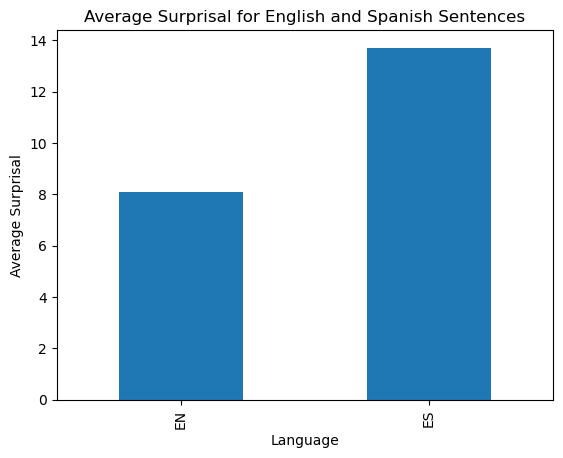

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('surprisal_results_tagged.csv')
avg = df.groupby('Language')['Surprisal'].mean()

avg.plot(kind='bar', title='Average Surprisal for English and Spanish Sentences')
plt.ylabel('Average Surprisal')
plt.xlabel('Language')
plt.show()

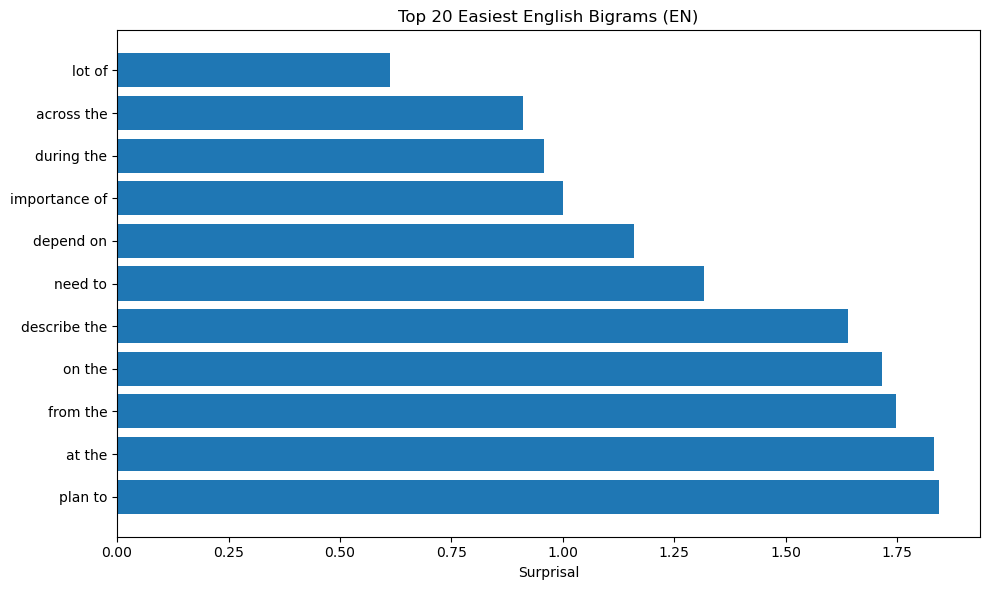

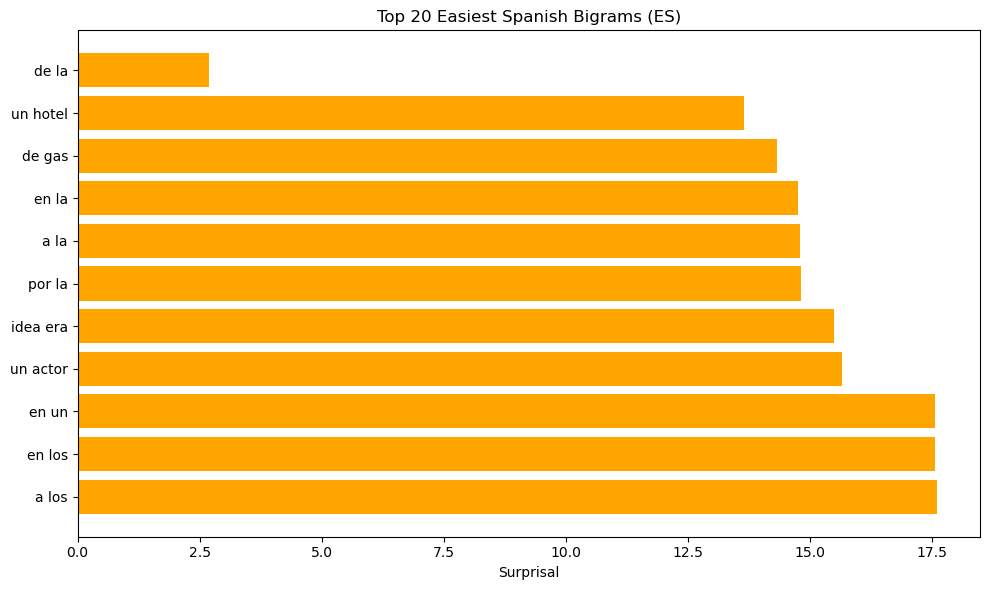

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your EN+ES results
df = pd.read_csv('surprisal_results_tagged.csv')

# Separate English and Spanish lines
df_en = df[df['Language'] == 'EN']
df_es = df[df['Language'] == 'ES']

# Sort English bigrams by surprisal (easiest first)
df_en_sorted = df_en.sort_values(by='Surprisal')

# Sort Spanish bigrams by surprisal (easiest first)
df_es_sorted = df_es.sort_values(by='Surprisal')

# Select top 20 easiest bigrams for each
top_20_en = df_en_sorted.head(20)
top_20_es = df_es_sorted.head(20)

# Plot English Top 20
plt.figure(figsize=(10,6))
plt.barh(top_20_en['Bigram'], top_20_en['Surprisal'])
plt.xlabel('Surprisal')
plt.title('Top 20 Easiest English Bigrams (EN)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot Spanish Top 20
plt.figure(figsize=(10,6))
plt.barh(top_20_es['Bigram'], top_20_es['Surprisal'], color='orange')
plt.xlabel('Surprisal')
plt.title('Top 20 Easiest Spanish Bigrams (ES)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


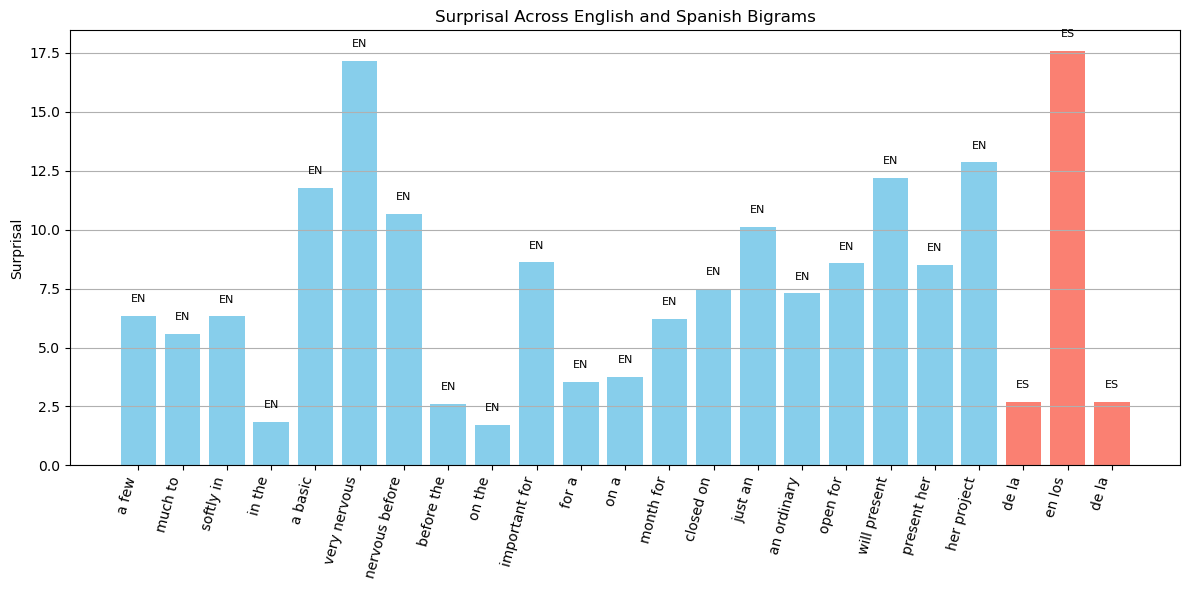

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Your selected slice of data (manually entered or reloaded)
data = pd.DataFrame({
    'Language': ['EN'] * 20 + ['ES'] * 3,
    'Bigram': [
        'a few', 'much to', 'softly in', 'in the', 'a basic',
        'very nervous', 'nervous before', 'before the', 'on the', 'important for',
        'for a', 'on a', 'month for', 'closed on', 'just an',
        'an ordinary', 'open for', 'will present', 'present her', 'her project',
        'de la', 'en los', 'de la'
    ],
    'Surprisal': [
        6.33, 5.59, 6.32, 1.86, 11.79,
        17.15, 10.67, 2.60, 1.71, 8.61,
        3.54, 3.77, 6.23, 7.49, 10.12,
        7.30, 8.57, 12.21, 8.49, 12.86,
        2.70, 17.58, 2.70
    ]
})

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(data)), data['Surprisal'], color=data['Language'].map({'EN': 'skyblue', 'ES': 'salmon'}))
plt.xticks(range(len(data)), data['Bigram'], rotation=75, ha='right')
plt.ylabel('Surprisal')
plt.title('Surprisal Across English and Spanish Bigrams')
plt.grid(axis='y')

# Add language labels on top
for i, bar in enumerate(bars):
    lang = data.loc[i, 'Language']
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, lang,
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


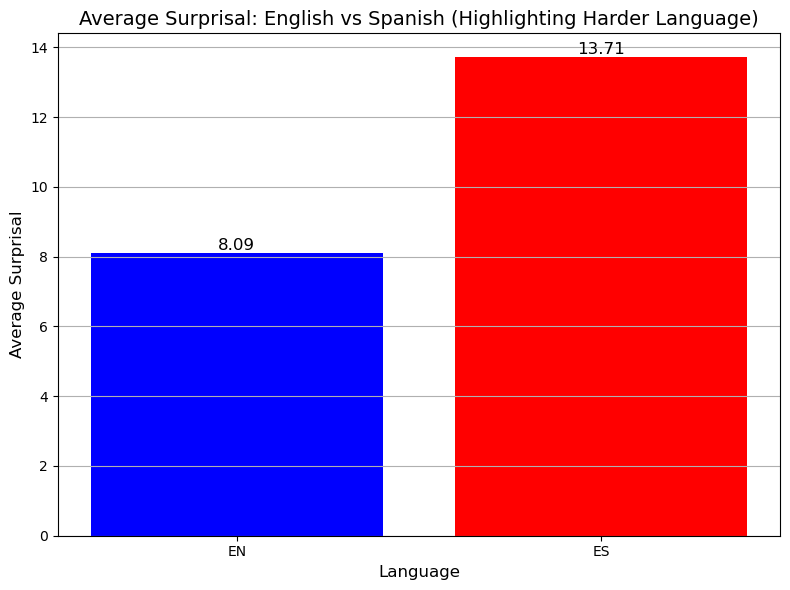

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your mixed English-Spanish results
df = pd.read_csv('surprisal_results_tagged.csv')

# Group by Language and calculate average surprisal
avg_surprisal = df.groupby('Language')['Surprisal'].mean()

# Set colors: highlight the higher bar in red
colors = ['blue' if val == avg_surprisal.min() else 'red' for val in avg_surprisal]

# Create the bar plot
plt.figure(figsize=(8,6))
bars = plt.bar(avg_surprisal.index, avg_surprisal.values, color=colors)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.0,
        height,
        f'{height:.2f}',    # show number with 2 decimal places
        ha='center', va='bottom', fontsize=12
    )

# Make the plot nice
plt.title('Average Surprisal: English vs Spanish (Highlighting Harder Language)', fontsize=14)
plt.ylabel('Average Surprisal', fontsize=12)
plt.xlabel('Language', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


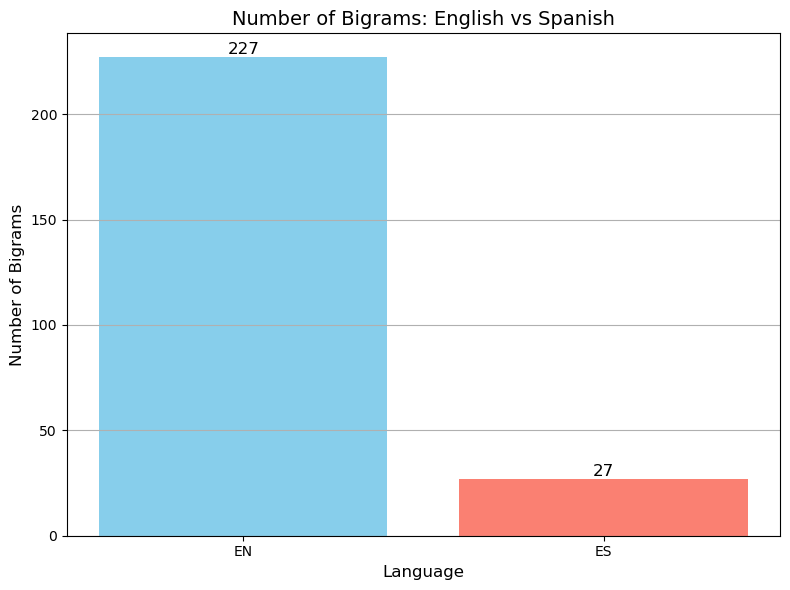

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your mixed English-Spanish results
df = pd.read_csv('surprisal_results_tagged.csv')

# Group by Language and count number of bigrams
bigram_counts = df.groupby('Language').size()

# Create the bar plot
plt.figure(figsize=(8,6))
bars = plt.bar(bigram_counts.index, bigram_counts.values, color=['skyblue', 'salmon'])

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.0,
        height,
        f'{int(height)}',    # show count as an integer
        ha='center', va='bottom', fontsize=12
    )

# Make the plot nice
plt.title('Number of Bigrams: English vs Spanish', fontsize=14)
plt.ylabel('Number of Bigrams', fontsize=12)
plt.xlabel('Language', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
